In [2]:
# Reproduzir Figuras 1.2 e 1.3 do livro
# Provar o teorema 1.5 (p. 10)
# Resolver o exercício T1.5 (p. 14)
# Reproduzir as figuras 1.6, 1.7 e 1.8 do livro
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def gen_orbit(x0, f, n, at_zero=True):
    xs = np.array([x0])
    ys = np.array([x0])
    if at_zero:
        ys[0] = 0

    for _ in range(n):
        xa = xs[-1]
        ya = f(xa)
        xb = ya
        yb = ya
        xs = np.append(xs, [xa, xb])
        ys = np.append(ys, [ya, yb])

    return xs, ys

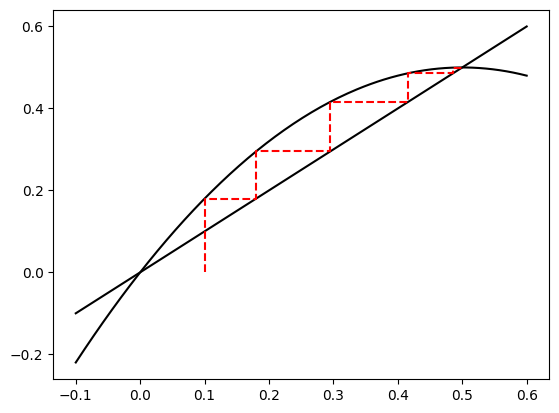

In [4]:
# Reproduzir Figuras 1.2 e 1.3 do livro
# Figure 1.2: A cobweb plot for an orbit  of g(x)= 2x(1-x)

f = lambda x: 2*x*(1-x)

x = np.linspace(-0.1, 0.6, 200)
y = f(x)
plt.plot(x, y, 'k')
plt.plot(x, x, 'k')
# finite amount of iterations for cobweb
n = 6
xp, yp = gen_orbit(0.1, f, n)
plt.plot(xp, yp, 'r--')

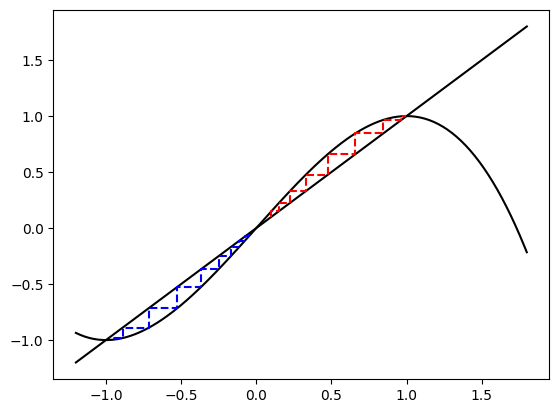

In [5]:
# Figure 1.3: A cobweb plot for two orbits of f(x)= (3x - x^3)/2

f = lambda x: 0.5*(3*x - x**3)

x = np.linspace(-1.2, 1.8, 200)
y = f(x)
plt.plot(x, y, 'k')
plt.plot(x, x, 'k')

# orbit A
na = 8
xpa, ypa = gen_orbit(0.1, f, na, at_zero=False)
# orbit B
nb = 9
xpb, ypb = gen_orbit(-0.05, f, nb, at_zero=False)

plt.plot(xpa, ypa, 'r--')
plt.plot(xpb, ypb, 'b--')

In [37]:
# Reproduzir as figuras 1.6, 1.7 e 1.8 do livro
# Figure 1.6: bifurcation diagram of g_a(x) = a*x*(1-x)

# algorithm for Figure 1.6
# 1. choose a value of a, starting with a = 1
# 2. choose x at random in [0,1]
# 3. iterate g_a(x) 100 times, discarding the first 100 iterates
# 4. plot the next 100 iterates in the bifurcation diagram
# 5. increment a by 0.001 and go to step 2

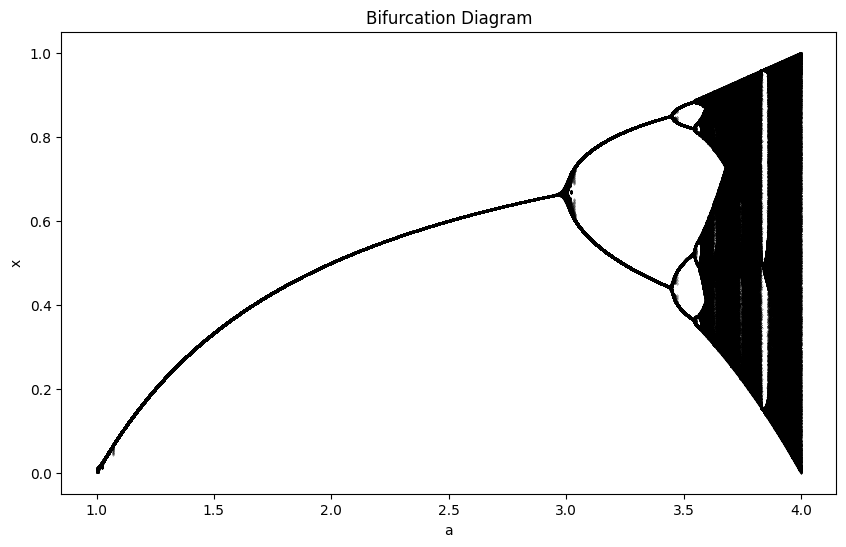

In [34]:
num_iterations = 100
dx = 1e-4
num_points = num_iterations * len(np.arange(1, 4, dx))
all_as = np.empty(num_points)
all_xs = np.empty(num_points)

index = 0
for a in np.arange(1, 4, dx):
    x = np.random.rand()
    for _ in range(100):  # Discard the first 100 iterates
        x = a * x * (1 - x)
    for _ in range(100):
        x = a * x * (1 - x)
        all_as[index] = a
        all_xs[index] = x
        index += 1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(all_as, all_xs, s=0.1, c='black', marker='.')
plt.xlabel('a')
plt.ylabel('x')
plt.title('Bifurcation Diagram')
plt.show()


Text(0.5, 0, 'a')

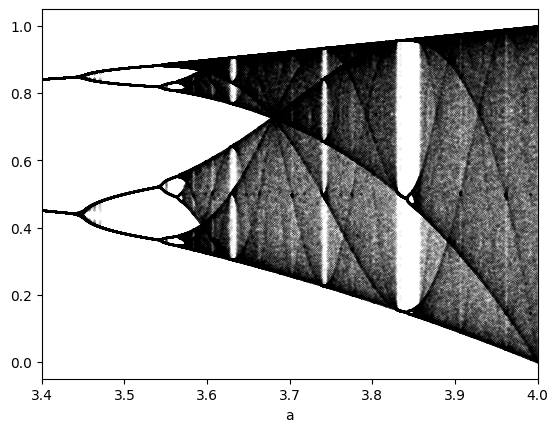

In [35]:
# plot all_as, all_xs from 3.4 <= a <= 4.0
# Figura 1.7 (a)
plt.plot(all_as, all_xs, 'k.', markersize=0.1)
plt.xlim(3.4, 4.0)
plt.xlabel('a')

Text(0.5, 0, 'a')

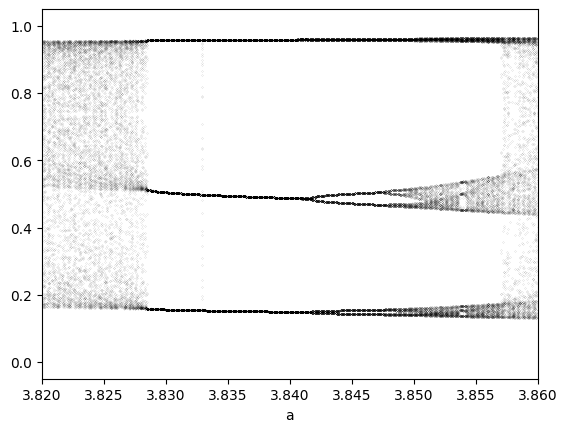

In [36]:
# Figura 1.7 (b)
plt.plot(all_as, all_xs, 'k.', markersize=0.1)
plt.xlim(3.82, 3.86)
plt.xlabel('a')

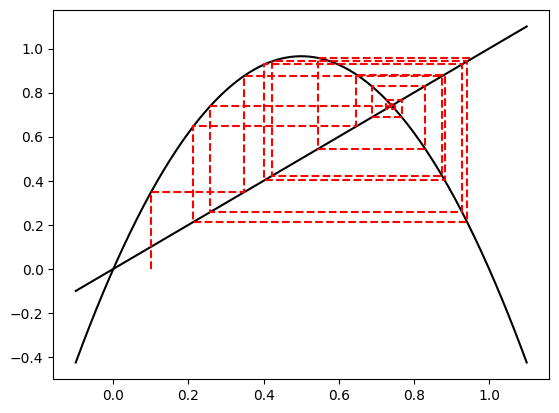

In [42]:
# Figura 1.8
# Figure 1.8: Cobweb plot for an orbit of g(x)= 3.86x(1-x)

f = lambda x: 3.86*x*(1-x)

x = np.linspace(-0.1, 1.1, 200)
y = f(x)
plt.plot(x, y, 'k')
plt.plot(x, x, 'k')
# finite amount of iterations for cobweb
n = 20
xp, yp = gen_orbit(0.1, f, n)
plt.plot(xp, yp, 'r--')